### Name: Crystal Lau
### Date: 06/18/2018
### Challenge: Feedback Analysis

Assignment: Pick one of the company data files and build your own classifier. When you're satisfied with its performance (at this point just using the accuracy measure shown in the example), test it on one of the other datasets to see how well these kinds of classifiers translate from one context to another.

Include your model and a brief writeup of your feature engineering and selection process to submit and review with your mentor.

from README:

Score is either 1 (for positive) or 0 (for negative)	
The sentences come from three different websites/fields:

imdb.com
amazon.com
yelp.com

For each website, there exist 500 positive and 500 negative sentences. Those were selected randomly for larger datasets of reviews. 
We attempted to select sentences that have a clearly positive or negative connotaton, the goal was for no neutral sentences to be selected.

Meaning that I only need to create a model that id's pos sentences

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB

In [2]:
# importing raw data and renaming columns
df = pd.read_csv('amazon_cells_labelled.txt', delimiter= '\t', header=None)
df.columns = ['reviews', 'pos_review']

In [3]:
# sample of data
df.head()

,reviews,pos_review
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [8]:
# list of positive and negative keywords to look for in reviews
pos_keywords = ['great', 'good', 'excellent', 'love', 'nice', 'awesome', 'best', 'satisfied']
neg_keywords = ['bad', 'waste', 'disappointed', 'worst','poor', 'horrible' ]

In [9]:
# iterrating through reviews to locate and classify key words
for key in pos_keywords:
    df[str(key)] = df.reviews.str.contains(' ' + str(key) + ' ', case=False)

In [6]:
# transforming column with indicator for pos/neg review
# to a boolean for better visualization
df['pos_review'] = (df['pos_review'] == 1)

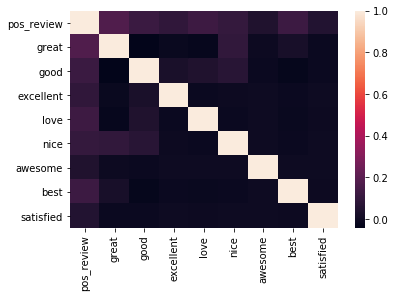

In [10]:
# heat map to show that words are independent of each other
sns.heatmap(df.corr())

In [11]:
# building training data
# 'data' are inputs and 'target' are outcomes
data = df[pos_keywords]
target = df['pos_review']

In [13]:
# instantiating model and fitting data to a Bernoulli model because our values are binary
bnb = BernoulliNB()
bnb.fit(data, target)

# classifying data
y_pred = bnb.predict(data)

# displaying results
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 397
